# Linear Models

## Setup
First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline:

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# allow multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Linear regression using the Normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a *closed-form solution*
—in other words, a mathematical equation that gives the result directly. This is called
the *Normal Equation*:

\begin{equation}
\hat{\theta} = (X^T\cdot X)^{-1}\cdot X^T\cdot y
\end{equation}

</br>
Let's generate some data: y=4 + 3x + $\epsilon$

Therefore, our true values of $\theta$ are as follows:
$\theta_0=4$ and $\theta_1=3$

In [ ]:
import numpy as np
# rand Return a sample (or samples)  from a uniform distribution over [0, 1)
X = 2 * np.random.rand(100, 1)
#randn Return a sample (or samples) from the “standard normal” distribution
y = 4 + 3 * X + np.random.randn(100, 1)

In [ ]:
#check the link for different options when plotting with pyplot
#https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Now let’s compute $\theta$ using the Normal Equation. We will use the *inv()* function from
NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and
the dot() method for matrix multiplication:

In [ ]:
#mp.c_ Translates slice objects to concatenation along the second axis
#if you want to get help on some function, just type "?" at the end of its name, for exampple np.c_?
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The actual function that we used to generate the data is $y = 4 + 3x_0$ + Gaussian noise.
Let’s see what the equation found:

In [ ]:
theta_best

We would have hoped for $\theta_0 = 4$ and $\theta_1 = 3$ instead of $\theta_0 = 4.215$ and $\theta_1 = 2.77$. Close
enough, but the noise made it impossible to recover the exact parameters of the original
function.

Now you can make predictions using $\hat{\theta}$. Let's check predictions for points x=0 and points x=3. Do not forget that we need to add the intercept term.

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

Let’s plot this model’s predictions:

In [ ]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

The equivalent code using Scikit-Learn looks like this:

(Note that Scikit-Learn separates the bias term (intercept_) from the feature weights (coef_).) The parameter fit_interceptbool is by default=True, so we do not need to add the bias term.


Let's compare the value of $\theta$ obtained, as well as the predictions.

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

In [ ]:
y_sklearn=lin_reg.predict(X_new)

In [ ]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="previous predictions")
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "g-.", linewidth=2, label="sklearn predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

# Linear regression using batch gradient descent

To implement Gradient Descent, you need to compute the gradient of the cost function
with regards to each model parameter $\theta_j$.

Once you have the gradient vector, which points uphill, just go in the opposite direction
to go downhill. This means subtracting $\nabla_\theta \mbox{MSE}(\theta)$ from $\theta$. This is where the learning rate $\alpha$ comes into play: multiply the gradient vector by η to determine the size of the downhill step

\begin{equation}
\theta^{(next step)} = \theta - \alpha\nabla_\theta\mbox{MSE}(\theta)
\end{equation}

Recall the expression for gradient calculation:


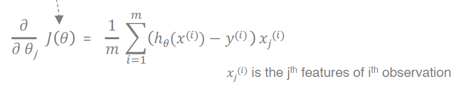

In [ ]:
# alpha is our learning rate
alpha = 0.1
n_iterations = 1000
# ms is the number of instances
m = X.shape[0]
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients

Let's check the value of $\theta$ found by gradient descent

In [ ]:
theta

That’s exactly what the Normal Equation found! Gradient Descent worked perfectly.
But what if you had used a different learning rate $\alpha$:

In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, alpha, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "k.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - alpha * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\alpha = {}$".format(alpha), fontsize=16)

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

#subplot arguments: Either a 3-digit integer or three separate integers describing the position of the subplot: nrows, ncols, and index i
plt.figure(figsize=(12,5))
plt.subplot(131); plot_gradient_descent(theta, alpha=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, alpha=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, alpha=0.5)

plt.show()

Our data is plotted in black.
Line with $\theta$ from the first iteration is in red.
Lines with $\theta$ from the next 20 iterations are drawn in blue.

On the left, the learning rate is too low: the algorithm will eventually reach the solution,
but it will take a long time. In the middle, the learning rate looks pretty good: in
just a few iterations, it has already converged to the solution. On the right, the learning
rate is too high: the algorithm diverges, jumping all over the place and actually
getting further and further away from the solution at every step.

# Polynomial regression

What if your data is actually more complex than a simple straight line? Surprisingly,
you can actually use a linear model to fit nonlinear data. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended
set of features. This technique is called Polynomial Regression.

In [ ]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

Let’s look at an example. First, let’s generate some nonlinear data, based on a simple
quadratic equation:

$y=2+x+0.5x^2+\epsilon$

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Let's plot and see our data.

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (in this case there is just one feature):

In [ ]:
#Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. 
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


Check the dimesion of our original data, and the one after adding the quadratic term.

In [ ]:
X.shape
X_poly.shape

X_poly now contains the original feature of X plus the square of this feature.Let's confirm this by looking at the first element.

In [ ]:
X[0], X[0]**2, X_poly[0]

Now you can fit a LinearRegression model to this extended training data:

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)


Let's check the values of estimated parameters and compare to the true ones: $y=2+x+0.5x^2+\epsilon$

In [ ]:
lin_reg.intercept_, lin_reg.coef_

Note that when there are multiple features, Polynomial Regression is capable of finding
relationships between features (which is something a plain Linear Regression
model cannot do). This is made possible by the fact that PolynomialFeatures also
adds all combinations of features up to the given degree:

In [ ]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

If you perform high-degree Polynomial Regression, you will likely fit the training
data much better than with plain Linear Regression. For example, the following figure applies
a 300-degree polynomial model to the preceding training data, and compares the
result with a pure linear model and a quadratic model (2nd-degree polynomial).
Notice how the 300-degree polynomial model wiggles around to get as close as possible
to the training instances.

Note the use of Pipeline operator that makes it easier to sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# Regularized models

Let's now check the effect of regularization

 Let's generate data corresponding to sine curve (between 60° and 300°) with some random noise.

In [ ]:
np.random.seed(10)  #Setting seed for reproducibility

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
y = np.sin(x) + np.random.normal(0,0.15,len(x))

plt.plot(x,y,'.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)


In [ ]:
from sklearn.linear_model import Ridge, Lasso
def poly_regression(model_class, x,y, models_to_plot,power, alpha, param,**model_kargs):
    polybig_features = PolynomialFeatures(degree=power, include_bias=False)
    std_scaler = StandardScaler()
    poly_reg = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("poly_reg", poly_reg),
        ])
    polynomial_regression.fit(x, y)
    y_pred = polynomial_regression.predict(x)
   # if power in models_to_plot:
    if param in models_to_plot:
        plt.subplot(models_to_plot[param])
        plt.tight_layout()
        plt.plot(x,y_pred,'r')
        plt.plot(x,y,'b.')
        plt.title(f'Plot for param:{param}')
    #Return the result in pre-defined format
    rss = sum((y_pred-y)**2)
    ret = [rss]
    ret.extend([poly_reg.intercept_])
    ret.extend(poly_reg.coef_)
    
    return ret

Let's first estimate the sine function using polynomial regression with powers of x from 1 to 15, without any regularization

In [ ]:
import pandas as pd
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}
x=x.reshape(-1,1)

In [ ]:
plt.figure(figsize=(10,10))
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] =  poly_regression(LinearRegression,x, y, models_to_plot , power=i,  alpha=0, param=i)

Check the error and the value of coefficients. Column rss corresponds to  sum of square of errors between the predicted and actual values in the training data set. Clearly, as the model complexity increases, the models tends to fit even smaller deviations in the training data set. The error decreases and the size of coefficients increases with increase in model complexity,

In [ ]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

## Ridge Regression 

Ridge regression performs L2 regularization, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. 
Thus, ridge regression minimizes the following:
Cost function = RSS + $\alpha$ * (sum of square of coefficients)
Here, $\alpha$  is the parameter which balances the amount of emphasis given to minimizing the original cost function vs minimizing sum of square of coefficients.

Let's look at the effect of alpha for our data and polynomial degreees up to 15.

In [ ]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 20:236}
plt.figure(figsize=(10,10))
for i in range(10):
    coef_matrix_ridge.iloc[i,] = poly_regression(Ridge,x, y, models_to_plot , power=15,  alpha=alpha_ridge[i], param=alpha_ridge[i])

 As the value of $\alpha$ increases, the model complexity reduces. Though higher values of alpha reduce overfitting, significantly high values can cause underfitting as well. ANd what abou the value of coefficients?

In [ ]:
coef_matrix_ridge

The error increases with increase in $\alpha$, as the model complexity reduces.
Even a small value of $\alpha$ such as $1e-15$ gives us significant reduction in magnitude of coefficients. 
Compare the coefficients in the first row of this table to the last row of simple linear regression table.
High $\alpha$  values can lead to significant underfitting.
Though the coefficients are very very small, they are not zero. Let's confirm this:

In [ ]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)


## Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the l1 norm
of the weight vector instead of half the square of the l2 norm

In [ ]:
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}
plt.figure(figsize=(10,10))
#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = poly_regression(Lasso, x, y, models_to_plot , power=15,  alpha=alpha_lasso[i], param=alpha_lasso[i],normalize=True, max_iter=1e5)

The model complexity decreases with increase in the values of $\alpha$. Again, let's check the error and the coefficients. 

In [ ]:
coef_matrix_lasso

For the same values of $\alpha$, the coefficients of lasso regression are much different than that of ridge regression (compare row 1 of the 2 tables).
As $\alpha$ increases the error really increases
Many of the coefficients are zero even for very small values of alpha. Again, let's see how many are zero.

In [ ]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

We can observe that even for a small value of $\alpha$, a significant number of coefficients are zero. 
For values of $\alpha=1$ and larger all the coefficients are zero! (except the intercept)

### Practice question

For the data below (x,y), plotted in blue, fit the polunomial regression model. 
Test different polynomial degrees. Try Ridge and Lasso with different $\alpha$ values.
How well does it predict the values of y_test for input x_test (red points)?

In [ ]:
np.random.seed(42)
m=100
x = 10 * np.random.rand(m)
y = np.cos(x) + 0.3 * np.random.normal(0,0.5,m)
plt.plot(x, y,'b.')
n_val=20
x_test = 10 * np.random.rand(n_val)
y_test = np.cos(x_test) + 0.3 * np.random.normal(0,0.5,n_val)
plt.plot(x_test, y_test,'r.')

# Logistic regression

Logistic Regression (also called Logit Regression) is commonly
used to estimate the probability that an instance belongs to a particular class
(e.g., what is the probability that this email is spam?). If the estimated probability is
greater than 0.5, then the model predicts that the instance belongs to that class
(called the positive class, labeled “1”), or else it predicts that it does not (i.e., it
belongs to the negative class, labeled “0”). This makes it a binary classifier.

## Estimating Probabilities

Just like a Linear Regression model, a Logistic Regression
model computes a weighted sum of the input features (plus a bias term), but instead
of outputting the result directly like the Linear Regression model does, it outputs the
logistic of this result

Logistic Regression model estimated probability (vectorized form):
\begin{equation}
\hat{p} = h_\theta(x)=\sigma(\theta^T\cdot x)
\end{equation}

The logistic—also called the logit, noted σ(·)—is a sigmoid function (i.e., S-shaped)
that outputs a number between 0 and 1:
\begin{equation}
\sigma(t) = \frac{1}{1+\mbox{exp}(-t)}
\end{equation}
First, let's plot the sigmoid function.

In [ ]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

plt.show()

## Decision Boundaries
Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that
contains the sepal and petal length and width of 150 iris flowers of three different
species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica:

Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal
width feature. First let’s load the data:

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

In [ ]:
print(iris.DESCR)

In [ ]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

Now let’s train a Logistic Regression model:

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y) 

In [ ]:
print("coeffecients:    ", log_reg.coef_)
print("intercept:", log_reg.intercept_)

Let’s look at the model’s estimated probabilities for flowers with petal widths varying
from 0 to 3 cm.

Note that this time we are  using predict_proba method and not predict.
In the case of a binary classifier:
- predict will give the predicted class
- predict_proba gives you the probabilities for the classes. The number of probabilities for each row is equal to the number of categories.

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g.", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)

The petal width of Iris-Virginica flowers (represented by triangles in the plot below) ranges from 1.4
cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a
smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap.
Above about 2 cm the classifier is highly confident that the flower is an Iris-
Virginica (it outputs a high probability to that class), while below 1 cm it is highly
confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica”
class). In between these extremes, the classifier is unsure. However, if you ask it to
predict the class (using the predict() method rather than the predict_proba()
method), it will return whichever class is the most likely. Therefore, there is a decision
boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal
width is higher than 1.6 cm, the classifier will predict that the flower is an Iris-
Virginica, or else it will predict that it is not (even if it is not very confident):

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

In [ ]:
decision_boundary

In [ ]:
log_reg.predict([[1.7], [1.5]])

The figure shows the same dataset but this time displaying two features: petal width
and length. Once trained, the Logistic Regression classifier can estimate the probability
that a new flower is an Iris-Virginica based on these two features. The dashed line
represents the points where the model estimates a 0.5 probability: this is the model’s
decision boundary. Note that it is a linear boundary. Each parallel line represents the
points where the model outputs a specific probability, from 0.15 (bottom left) to 0.9
(top right). All the flowers beyond the top-right line have an over 0.9 chance of
being Iris-Virginica according to the model.

In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

## Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly,
without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.

Let’s use Softmax Regression to classify the iris flowers into all three classes. Scikit-
Learn’s LogisticRegression uses one-versus-all by default when you train it on more
than two classes, but you can set the multi_class hyperparameter to "multinomial"
to switch it to Softmax Regression instead. You must also specify a solver that supports
Softmax Regression, such as the "lbfgs" solver

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

So the next time you find an iris with 5 cm long and 2 cm wide petals, you can ask
your model to tell you what type of iris it is, and it will answer Iris-Virginica (class 2)
with 94.2% probability (or Iris-Versicolor with 5.8% probability):

In [ ]:
softmax_reg.predict([[5, 2]])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

Figure below shows the resulting decision boundaries, represented by the background
colors. Notice that the decision boundaries between any two classes are linear. The
figure also shows the probabilities for the Iris-Versicolor class, represented by the
curved lines (e.g., the line labeled with 0.450 represents the 0.45 probability boundary).
Notice that the model can predict a class that has an estimated probability below
0.50. For example, at the point where all decision boundaries meet, all classes have an
equal estimated probability of 0.33.

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

## Practice question

Load the Breast cancer wisconsin (diagnostic) dataset from sklearn with

bc=datasets.load_breast_cancer() 
(like we used load_iris()).


Check the details of the dataset with bc.DESCR and bc.keys.

It’s important to note that all of Scikit-Learn datasets are divided into data and target. 
data represents the features, which are the variables that help the model learn how to predict.
target includes the actual labels. 
In our case, the target data is one column classifies the tumor as either 0 indicating malignant or 1 for benign.
You can convert the data into panda dataframe as: (do not forget to import panadas as pd)

df = pd.DataFrame(bc.data, columns=bc.feature_names)

First build the logistic regression model with all the instances, and then predict the class of the same instances you used in training.
You can check how many of each class did the model predict well with

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_label, predicted_label)

pd.DataFrame(cm)

Then you can take out some data before training with

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(bc.data,bc.target,train_size=.75, random_state=42)

You can use the X_train and Y_train to train the model, then predict on X_test and compare predictions with Y_test.
Is there a difference in performance?